# eda-british-airway-reviews

_Sentiment Analysis of British Airway Reviews_

British Airways is the flag carrier of the United Kingdom. It is headquartered in London, England, near its main hub at Heathrow Airport. The airline is the second largest UK-based carrier, based on fleet size and passengers carried, behind easyJet. In this EDA, I will explore the British Airway reviews dataset through visualizations and graphs using matplotlib and seaborn followed by Sentiment Analysis.

### Download and Explore Dataset

In [ ]:
!pip install pandas --quiet

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("british_airways_reviews.csv")

In [ ]:
df.head(5)

,date,country,reviews,ratings,comments
0,9th July 2023,United Kingdom,"""Things have really deteriorated""",4,✅ Trip Verified | My family and I have flown ...
1,9th July 2023,United States,"""I will never fly this airline again""",2,✅ Trip Verified | This has been by far the wo...
2,8th July 2023,United Kingdom,"""asked for an explanation but have received none""",2,✅ Trip Verified | In Nov 2022 I booked and pa...
3,6th July 2023,United Kingdom,"""short-changing passengers""",4,Not Verified | BA is not treating its premium ...
4,5th July 2023,South Africa,"""Economy is absolutely awful""",1,✅ Trip Verified | 24 hours before our departu...


In [ ]:
df.shape

(1000, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      1000 non-null   object
 1   country   1000 non-null   object
 2   reviews   1000 non-null   object
 3   ratings   1000 non-null   int64 
 4   comments  1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [ ]:
df.isna().sum()

date        0
country     0
reviews     0
ratings     0
comments    0
dtype: int64

### Data Preprocessing

- There are no null values/ missing values in out dataset.
- Removing punctuation.
- Removing (✅ Trip Verified | and Not Verified | ) to clean the data.
- Removing any leading or trailing spaces.
- Turning the review string to all lower case.

We will create a column which mentions if the user is verified or not.

In [ ]:
df['verified'] = df.comments.str.contains("Trip Verified")

In [ ]:
df['verified']

0       True
1       True
2       True
3      False
4       True
       ...  
995     True
996     True
997    False
998     True
999     True
Name: verified, Length: 1000, dtype: bool

Let us see our data which need to be preprocessed.

In [ ]:
df.head(5)

,date,country,reviews,ratings,comments,verified
0,9th July 2023,United Kingdom,"""Things have really deteriorated""",4,✅ Trip Verified | My family and I have flown ...,True
1,9th July 2023,United States,"""I will never fly this airline again""",2,✅ Trip Verified | This has been by far the wo...,True
2,8th July 2023,United Kingdom,"""asked for an explanation but have received none""",2,✅ Trip Verified | In Nov 2022 I booked and pa...,True
3,6th July 2023,United Kingdom,"""short-changing passengers""",4,Not Verified | BA is not treating its premium ...,False
4,5th July 2023,South Africa,"""Economy is absolutely awful""",1,✅ Trip Verified | 24 hours before our departu...,True


In [ ]:
df['reviews'] = df['reviews'].str.strip('""')

In [ ]:
df['comments'] = df['comments'].str.lstrip('✅ Trip Verified | ')

In [ ]:
df['comments'] = df['comments'].str.lstrip('Not Verified | ')

Let us see our data after preprocessing.

In [ ]:
df.head(5)

,date,country,reviews,ratings,comments,verified
0,9th July 2023,United Kingdom,Things have really deteriorated,4,My family and I have flown mostly on British A...,True
1,9th July 2023,United States,I will never fly this airline again,2,his has been by far the worst service I have h...,True
2,8th July 2023,United Kingdom,asked for an explanation but have received none,2,In Nov 2022 I booked and paid for a return jou...,True
3,6th July 2023,United Kingdom,short-changing passengers,4,BA is not treating its premium economy passeng...,False
4,5th July 2023,South Africa,Economy is absolutely awful,1,24 hours before our departure on BA059 to Cape...,True


In [ ]:
df.columns

Index(['date', 'country', 'reviews', 'ratings', 'comments', 'verified'], dtype='object')

In [ ]:
def combine_reviews(df):
    if 'reviews' in df.columns:
        df['review'] = df['reviews'] + ' ' + df['comments']
        df.drop(['reviews', 'comments'], axis='columns', inplace=True)

In [ ]:
combine_reviews(df)

In [ ]:
df.head()

,date,country,ratings,verified,review
0,9th July 2023,United Kingdom,4,True,Things have really deteriorated My family and ...
1,9th July 2023,United States,2,True,I will never fly this airline again his has be...
2,8th July 2023,United Kingdom,2,True,asked for an explanation but have received non...
3,6th July 2023,United Kingdom,4,False,short-changing passengers BA is not treating i...
4,5th July 2023,South Africa,1,True,Economy is absolutely awful 24 hours before ou...


### Sentiment Analysis

Sentiment analysis is a machine learning tool that analyzes texts for polarity, from positive to negative.

In [ ]:
import re

In [ ]:
!pip install nltk --quiet

In [ ]:
import nltk

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#for lemmatization of words we will use nltk library
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()

In [ ]:
#create an empty list to collect cleaned data corpus
cleaned_review =[]

In [ ]:
#loop through each review, remove punctuations, lower case it, join it and add it to corpus
for rev in df.review:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemmatizer.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    cleaned_review.append(rev)

In [ ]:
# add the corpus to the original dataframe
df['cleaned_review'] = cleaned_review

In [ ]:
df.head(5)

,date,country,ratings,verified,review,cleaned_review
0,9th July 2023,United Kingdom,4,True,Things have really deteriorated My family and ...,thing really deteriorated family flown mostly ...
1,9th July 2023,United States,2,True,I will never fly this airline again his has be...,never fly airline far worst service plane obvi...
2,8th July 2023,United Kingdom,2,True,asked for an explanation but have received non...,asked explanation received none nov booked pai...
3,6th July 2023,United Kingdom,4,False,short-changing passengers BA is not treating i...,short changing passenger ba treating premium e...
4,5th July 2023,South Africa,1,True,Economy is absolutely awful 24 hours before ou...,economy absolutely awful hour departure ba cap...


Let us see now polarity and sentiment of the cleaned review.

In [ ]:
!pip install TextBlob --quiet

In [ ]:
from textblob import TextBlob

In [ ]:
def polarity(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

def sentiment(num):
    if num<0:
        return 'Negative'
    elif num>0:
        return 'Positive'
    else:
        return 'Neutral'

In [ ]:
df['polarity'] = df['cleaned_review'].apply(polarity)

In [ ]:
df['sentiment'] = df['polarity'].apply(sentiment)

In [ ]:
df.head(5)

,date,country,ratings,verified,review,cleaned_review,polarity,sentiment
0,9th July 2023,United Kingdom,4,True,Things have really deteriorated My family and ...,thing really deteriorated family flown mostly ...,0.159140,Positive
1,9th July 2023,United States,2,True,I will never fly this airline again his has be...,never fly airline far worst service plane obvi...,-0.089423,Negative
2,8th July 2023,United Kingdom,2,True,asked for an explanation but have received non...,asked explanation received none nov booked pai...,0.129545,Positive
3,6th July 2023,United Kingdom,4,False,short-changing passengers BA is not treating i...,short changing passenger ba treating premium e...,-0.008333,Negative
4,5th July 2023,South Africa,1,True,Economy is absolutely awful 24 hours before ou...,economy absolutely awful hour departure ba cap...,-0.077932,Negative


The above result is obtained after cleaning the review data with new addition of polarity and sentiment.

### Data Visualization

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#### Ratings given by passengers

In [ ]:
per_rating = df.ratings.value_counts()

<AxesSubplot:xlabel='ratings', ylabel='count'>

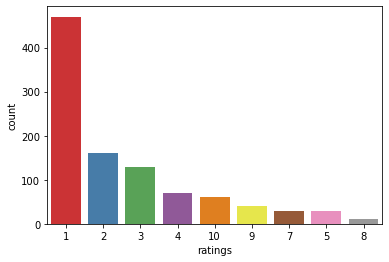

In [ ]:
sns.countplot(x = 'ratings', data = df, order = per_rating.index, palette = 'Set1')

In the above graph, we can see ratings in the decreasing manner with respect to count. The rating one represents the largest group of passengers followed by second, third, forth and tenth rating.

#### Country information of passengers

In [ ]:
df["country"].value_counts().head(5)

United Kingdom    430
United States     320
Australia          30
Canada             30
Greece             20
Name: country, dtype: int64

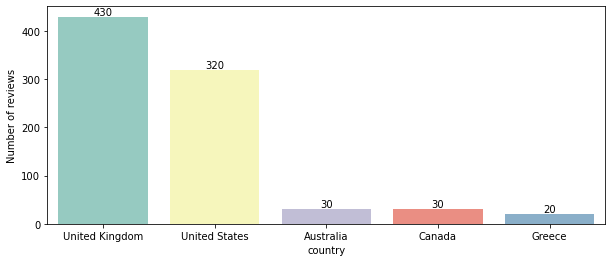

In [ ]:
plt.figure(figsize=(10, 4))
ax = sns.countplot(x = "country", data = df, order = df.country.value_counts().head().index
                   , palette = 'Set3' )
ax.bar_label(ax.containers[0])
ax.set_xlabel("country")
ax.set_ylabel("Number of reviews")
plt.show()

The above graph shows the top 5 countries with the largest number of reviews of the passenger.

In [ ]:
country_ratings = df.groupby("country")["ratings"].sum().sort_values(ascending=False).reset_index()

In [ ]:
country_ratings.head()

,country,ratings
0,United Kingdom,1470
1,United States,510
2,Netherlands,110
3,Chile,100
4,Cyprus,100


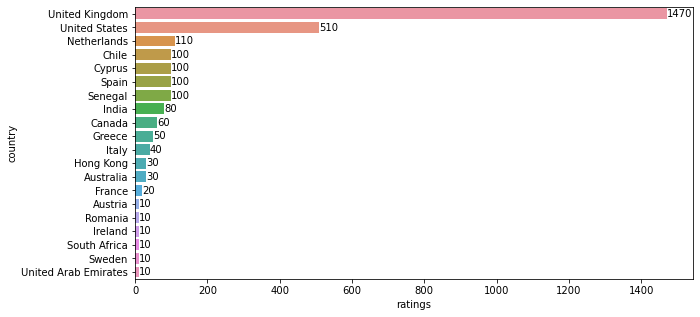

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(y = "country", x = "ratings", data = country_ratings)

ax.bar_label(ax.containers[0])
plt.show()

In the above graph, we can see amount of ratings in the decreasing manner with respect to country of passengers. The top one represents United Kingdom where the largest group of passengers provided the rating feedback followed by United States, Netherlands, Chile, Cyprus etc provided the total number of ratings representing the affinity of passengers towards our services.

#### Words used to express in reviews

In [ ]:
!pip install wordcloud --quiet

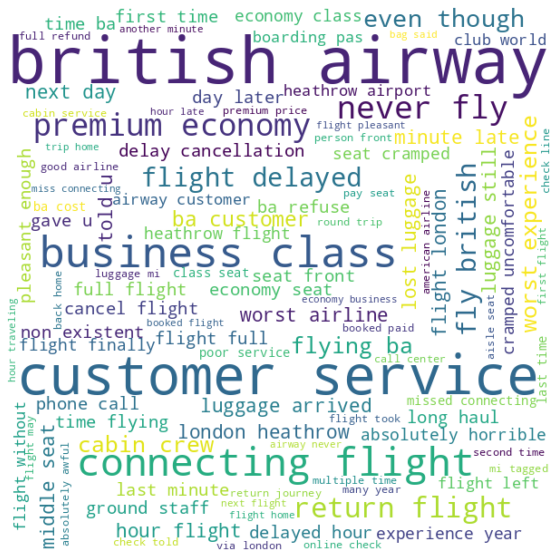

In [ ]:
from wordcloud import WordCloud

reviews = " ".join(df.cleaned_review)
plt.figure(figsize=(20,10))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=100, background_color='white').generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The word cloud above shows similar words and key topics within the reviews with respect to frequency of words used. For example - british airway, customer service, business class, premium economy, fly british, never fly, full flight, worst airline, pleasant enough, seat cramped etc.

['thing', 'really', 'deteriorated', 'family', 'flown', 'mostly', 'british', 'airway', 'last', 'year', 'priority', 'passenger', 'fly', 'often', 'enough', 'recognise', 'cabin', 'crew', 'know', 'name', 'used', 'really', 'good', 'airline', 'fly', 'thing', 'really', 'deteriorated', 'face', 'face', 'customer', 'care', 'since', 'pandemic', 'aircraft', 'look', 'worn', 'example', 'flight', 'back', 'audiovisual', 'equipment', 'work', 'reset', 'twice', 'finally', 'working', 'last', 'hour', 'landed']


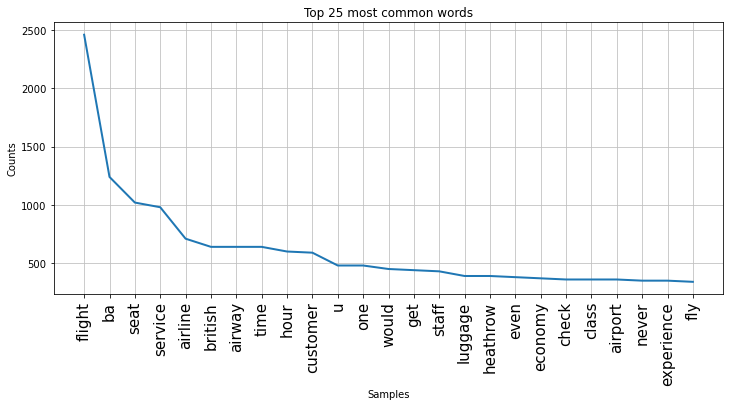

In [ ]:
# Write the code for plotting the cleaned review
all_words = []
for t in df["cleaned_review"]:
    all_words.extend(t.split())

print(all_words[:50])

# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

The frequency chart above shows that the key words within the reviews include flight, ba, seat, service, airline etc shows that people are actively expressing sentiment related to flight inner arrangement and flight service time using these words.

#### Sentiment of Passengers

Out of 1000 reviews, 420 were positive, 570 were negative and 10 were neutral. This means the majority of reviews were polarised as either positive or negative.

In [ ]:
df["sentiment"].value_counts(normalize=True)*100

Negative    57.0
Positive    42.0
Neutral      1.0
Name: sentiment, dtype: float64

<Figure size 720x720 with 0 Axes>

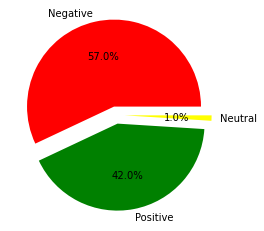

In [ ]:
# calculate the percentage of each type of sentiment score
sentiment_type_percentages = df["sentiment"].value_counts(normalize=True) * 100

# create the pie chart
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
ax.pie(
    sentiment_type_percentages,
    labels=sentiment_type_percentages.index,
    colors=['red', 'green', 'yellow'],
    explode=[0.1, 0.1, 0.1],
    autopct='%1.1f%%'
    )

plt.show()

In the above pie diagram, we can see 57 % negative sentiment, 42 % positive sentiment and the remaining 10 % is neutral sentiment.

### Inferences

If we visit [https://www.airlinequality.com] we can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself which we scraped data from Skytrax.

From the above analysis, we can infer the following points :
- Most of the customers has rated low followed by high rating while minority with low rating.
- Majority of the customers has the negative sentiment.
- Customers were reportedly dissatisfied by the frequent flight delays, connecting flights, and flying hours.
- We can also observe other issues from the cloud image, like crammed seats, misplaced bags and poor customer service.
- Regular customers appear to be unsatisfied, which raises the question of whether our service is cost effective for passengers.